In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
df=pd.read_csv('Nestle big boi.csv',encoding='ISO-8859-1')
df.head()

,Date,Text,Username,Like Count,Retweet Count,Follower Count
0,2010-12-30 16:00:48+00:00,Love the #Nestle tvc on ... Really awesome,Dominication,0.0,0.0,366.0
1,2010-12-30 10:20:53+00:00,RT @bmi_cfw: L'Oreal Continues To Work With #N...,BMIResearch,0.0,0.0,17221.0
2,2010-12-29 06:00:08+00:00,*HOT* #Nestle Nesquik $1.25 Off #Coupon http:/...,maritramos,0.0,1.0,7771.0
3,2010-12-28 22:01:24+00:00,Oatmeal Scotchies!!! Best cookies ever! http:/...,megansmunchies,0.0,0.0,1811.0
4,2010-12-28 18:51:03+00:00,RT @ameliatimbers U.S. #Muslims : A New #Consu...,AndresTTapia,0.0,1.0,3291.0


In [3]:
df.columns

Index(['Date', 'Text', 'Username', 'Like Count', 'Retweet Count',
       'Follower Count'],
      dtype='object')

In [4]:
# Drop Username column
df.drop('Username',inplace=True,axis=1)

In [5]:
# Check any missing values
df.isnull().sum()

Date               30
Text               80
Like Count        160
Retweet Count     240
Follower Count    240
dtype: int64

In [6]:
for col in df.columns:
    print(col,':',(df[col].isnull().sum()/len(df))*100,'%')

Date : 0.017480887562931195 %
Text : 0.04661570016781652 %
Like Count : 0.09323140033563304 %
Retweet Count : 0.13984710050344956 %
Follower Count : 0.13984710050344956 %


In [7]:
# Drop the missing values as its count is very less compared to the entire dataset
df.dropna(inplace=True)
len(df)

171376

In [8]:
# Drop the duplicates
df = df.drop_duplicates(subset='Text')
len(df)

88308

In [9]:
# extract hashtags from the Text column
hashtags = []
for text in df['Text']:
    hashtags += re.findall(r'#\w+', text)

# count the frequency of each hashtag
freq = Counter(hashtags)

# sort the hashtags by frequency
sorted_hashtags = sorted(freq.items(), key=lambda x: x[1], reverse=True)

# extract the top 20 hashtags
top_20_hashtags = sorted_hashtags[:20]

# print the top 20 hashtags with their frequency
for hashtag, count in top_20_hashtags:
    print(f"{hashtag}: {count}")

#smarties: 5726
#Maggi: 5334
#boost: 5313
#Nestle: 5199
#kitkat: 5031
#nespresso: 4794
#carnation: 4326
#Nespresso: 4185
#maggi: 4149
#nescafe: 4007
#coffee: 3860
#nestle: 3680
#Nescafe: 3387
#KitKat: 3172
#dolcegusto: 3068
#Carnation: 2888
#Smarties: 2839
#Boost: 2575
#DolceGusto: 2473
#NestleIndia: 2079


In [10]:
# Remove URLs, mentions, and hashtags
def remove_twitter_elements(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    return tweet

df['Text'] = df['Text'].apply(remove_twitter_elements)

In [11]:
#removing emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Text'] = df['Text'].apply(remove_emojis)

In [12]:
#removing punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['Text'] = df['Text'].apply(remove_punctuation)

In [13]:
# Remove special characters 
def remove_special_characters(tweet):
    tweet = re.sub('[^a-zA-Z0-9\s]', '', tweet)
    return tweet

df['Text'] = df['Text'].apply(remove_special_characters)

In [14]:
# converting to lowercase
df['Text'] = df['Text'].apply(lambda x: x.lower())

In [15]:
# Tokenize the text
def tokenize(tweet):
    tokens = nltk.word_tokenize(tweet)
    return tokens

df['Text'] = df['Text'].apply(tokenize)

In [16]:
# Remove stop words
def remove_stop_words(tokens):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update(['nestl', 'nestleindia', 'nestleind','camat','amp','rt','morn','rt','one'])
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

df['Text'] = df['Text'].apply(remove_stop_words)

In [17]:
# Stemming or Lemmatization
def stem_tokens(tokens):
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['Text'] = df['Text'].apply(stem_tokens)

In [18]:
# Normalize case
def normalize_case(tokens):
    normalized_tokens = [token.lower() for token in tokens]
    return normalized_tokens

df['Text'] = df['Text'].apply(normalize_case)

In [19]:
# join tokens back into a single string
def join_text(tweet):
    joined_tweet = " ".join(tweet)
    return joined_tweet

df['Text'] = df['Text'].apply(join_text)

In [20]:
# Convert date to extract Year, Month, Day
df['Date']=pd.to_datetime(df['Date'])

df['Year'] = df['Date'].apply(lambda date:date.year)
df['Month'] = df['Date'].apply(lambda date:date.month)
df['Day']=df['Date'].apply(lambda date:date.day)
df['Date'] = df['Date'].dt.date

In [21]:
df.head()

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day
0,2010-12-30,love nestl tvc realli awesom,0.0,0.0,366.0,2010,12,30
1,2010-12-30,loreal continu work time analyst ponder takeov...,0.0,0.0,17221.0,2010,12,30
2,2010-12-29,hot nestl nesquik 125 coupon printablecoupon c...,0.0,1.0,7771.0,2010,12,29
3,2010-12-28,oatmeal scotchi best cooki ever nestl,0.0,0.0,1811.0,2010,12,28
4,2010-12-28,us muslim new consum nich nestl increas halal ...,0.0,1.0,3291.0,2010,12,28


In [22]:
# define a function to get the polarity of a tweet
def get_tweet_polarity(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# add a polarity column to the DataFrame
df['polarity'] = df['Text'].apply(get_tweet_polarity)


In [23]:
df.head()

,Date,Text,Like Count,Retweet Count,Follower Count,Year,Month,Day,polarity
0,2010-12-30,love nestl tvc realli awesom,0.0,0.0,366.0,2010,12,30,positive
1,2010-12-30,loreal continu work time analyst ponder takeov...,0.0,0.0,17221.0,2010,12,30,neutral
2,2010-12-29,hot nestl nesquik 125 coupon printablecoupon c...,0.0,1.0,7771.0,2010,12,29,positive
3,2010-12-28,oatmeal scotchi best cooki ever nestl,0.0,0.0,1811.0,2010,12,28,positive
4,2010-12-28,us muslim new consum nich nestl increas halal ...,0.0,1.0,3291.0,2010,12,28,positive


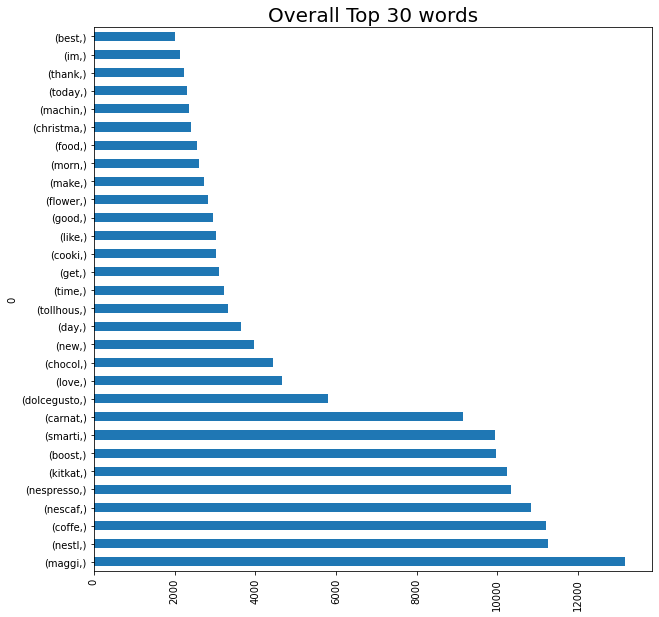

In [24]:
#Overall top 30 words
overall_corpus=[]
for msg in df['Text'].tolist():
    for word in msg.split():
        overall_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(overall_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Overall Top 30 words',size=20)
plt.show()

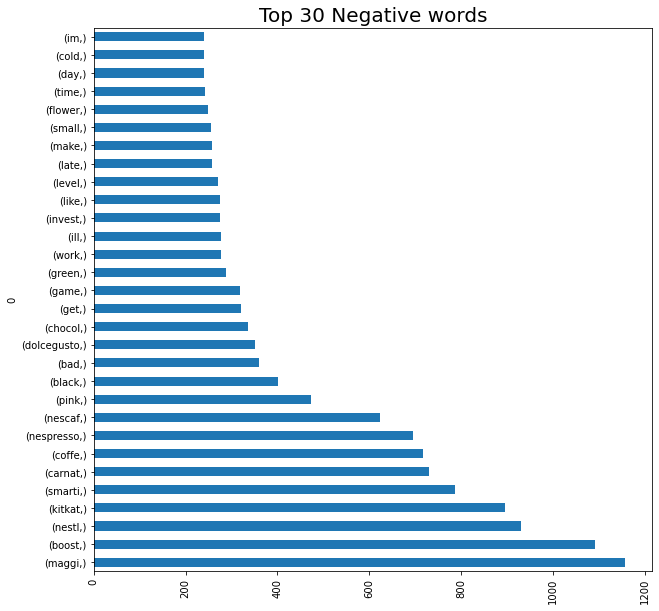

In [25]:
#top negative 30 words
negative_corpus=[]
for msg in df[df['polarity']=='negative']['Text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(negative_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Top 30 Negative words',size=20)
plt.show()

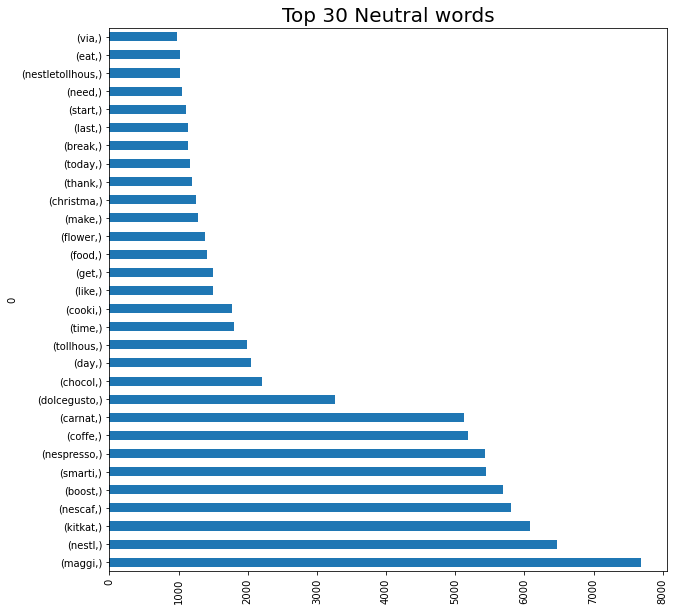

In [26]:
#top neutral 30 words
neutral_corpus=[]
for msg in df[df['polarity']=='neutral']['Text'].tolist():
    for word in msg.split():
        neutral_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(neutral_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Top 30 Neutral words',size=20)
plt.show()

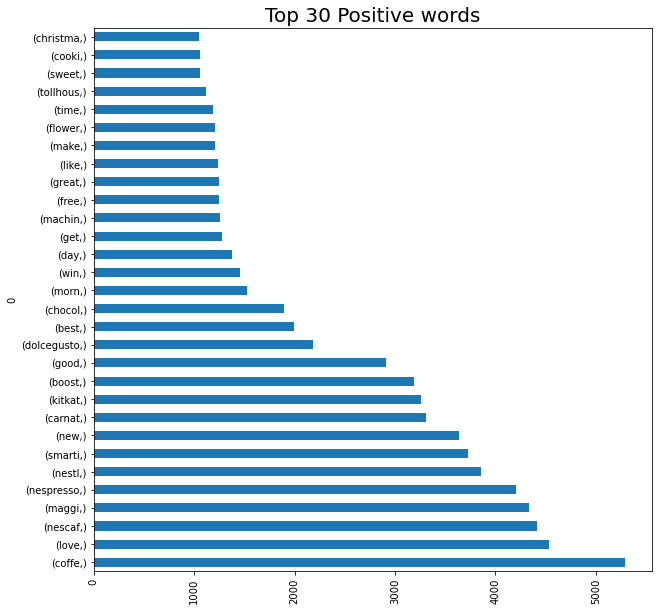

In [27]:
#top positive 30 words
positive_corpus=[]
for msg in df[df['polarity']=='positive']['Text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)
        
plt.figure(figsize=(10,10))
pd.DataFrame(positive_corpus).value_counts(ascending=False)[0:30].plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Top 30 Positive words',size=20)
plt.show()

In [28]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

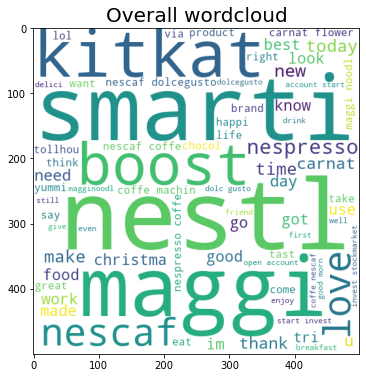

In [29]:
#Overall
overall_wc=wc.generate(df['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(overall_wc)
plt.title('Overall wordcloud',fontsize=20)
plt.show()

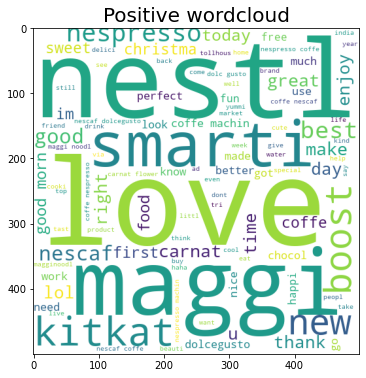

In [30]:
#positive
positive_wc=wc.generate(df[df['polarity']=='positive']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(positive_wc)
plt.title('Positive wordcloud',fontsize=20)
plt.show()

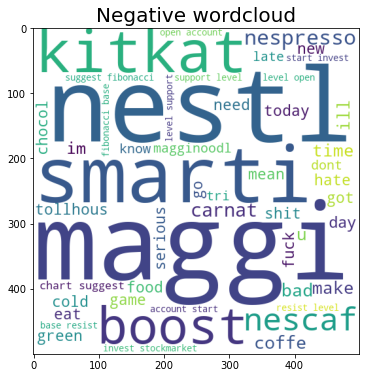

In [31]:
#negative
negative_wc=wc.generate(df[df['polarity']=='negative']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(negative_wc)
plt.title('Negative wordcloud',fontsize=20)
plt.show()

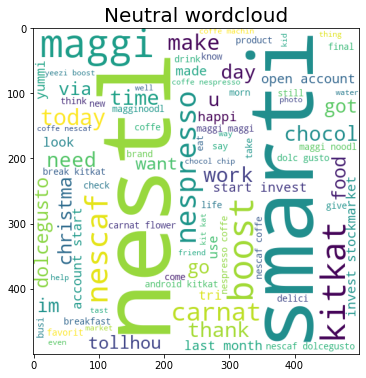

In [32]:
#neutral
neutral_wc=wc.generate(df[df['polarity']=='neutral']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(neutral_wc)
plt.title('Neutral wordcloud',fontsize=20)
plt.show()

### Wordcloud after eliminating irrelevant terms

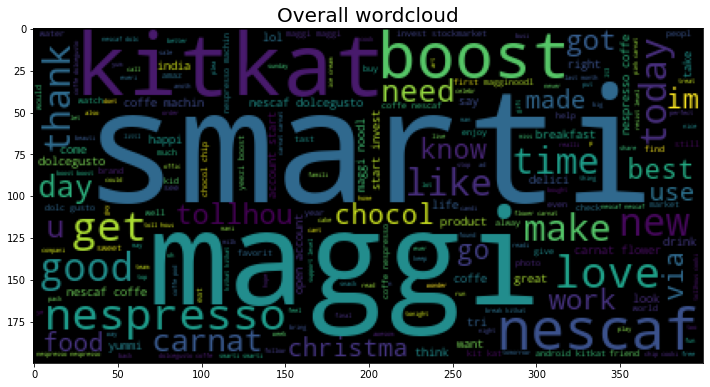

In [33]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['nestl', 'nestleindia', 'nestleind','camat','amp','rt','morn','rt','one'])
wordcloud = WordCloud(stopwords=stop_words).generate(df['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Overall wordcloud',fontsize=20)
plt.show()

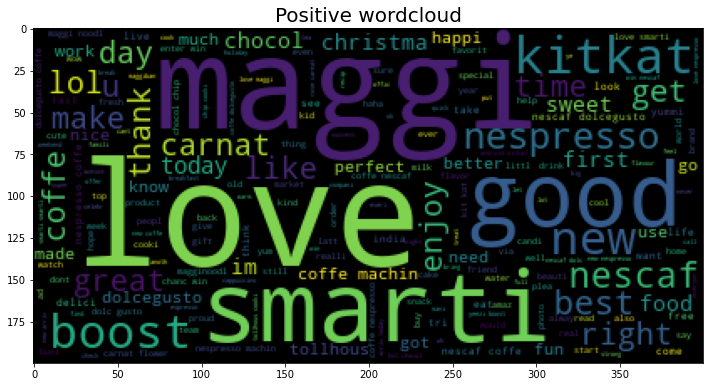

In [34]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['nestl', 'nestleindia', 'nestleind','amp','rt','morn','rt','morn','one'])
wordcloud = WordCloud(stopwords=stop_words).generate(df[df['polarity']=='positive']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Positive wordcloud',fontsize=20)
plt.show()

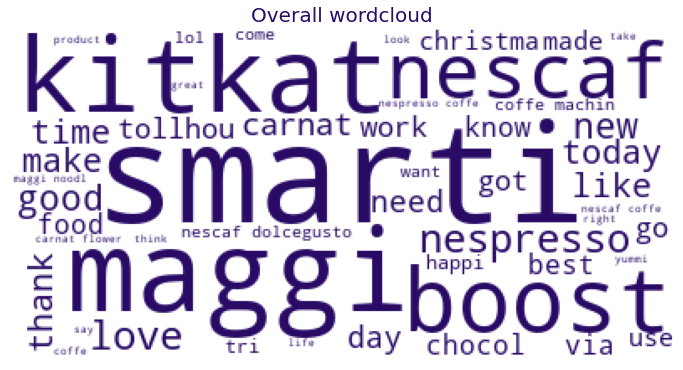

In [67]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['nestl', 'nestleindia', 'nestleind','amp','rt','morn','rt','morn','one','u','im','get'])

# Set the background color to dark blue
background_color = 'white'

# Set the text color to white
text_color = '#290B66'

# Set the maximum number of words to 40
max_words = 50

wordcloud = WordCloud(stopwords=stop_words, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(df['Text'].str.cat(sep=" "))

plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Overall wordcloud', fontsize=20, color=text_color)
plt.axis('off')
plt.show()
#In this updated code, we set the max_words parameter of the WordCloud object to 40. This will limit the number of words displayed in the wordcloud to 40, even if there are more than 40 words that meet the criteria.


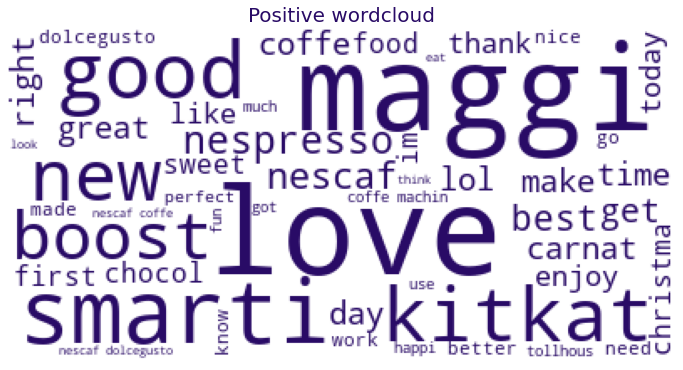

In [66]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['nestl', 'nestleindia', 'nestleind','amp','rt','morn','rt','morn','one','u'])

# Set the background color to dark blue
background_color = 'white'

# Set the text color to white
text_color = '#290B66'

# Set the maximum number of words to 40
max_words = 50

wordcloud = WordCloud(stopwords=stop_words, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(df[df['polarity']=='positive']['Text'].str.cat(sep=" "))

plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Positive wordcloud', fontsize=20, color=text_color)
plt.axis('off')
plt.show()
#In this updated code, we set the max_words parameter of the WordCloud object to 40. This will limit the number of words displayed in the wordcloud to 40, even if there are more than 40 words that meet the criteria.


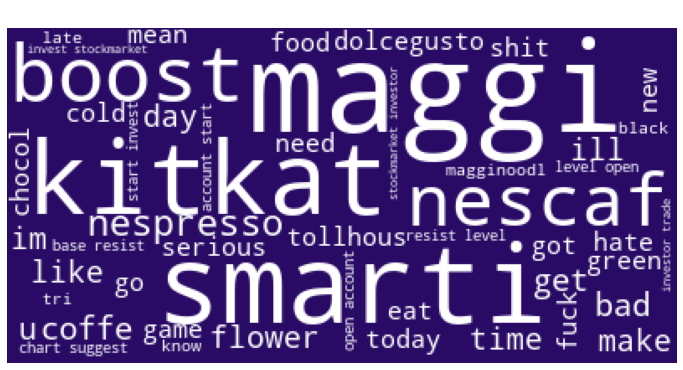

In [56]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['ladi','one','amp','nestl','pink','nestleindia','nestleind','carnat','fibonacci','support'])

# Set the background color to dark blue
background_color = '#290B66'

# Set the text color to white
#text_color = 'white'

# Set the maximum number of words to 40
max_words = 50

wordcloud = WordCloud(stopwords=stop_words, background_color=background_color, color_func=lambda *args, **kwargs: text_color, max_words=max_words).generate(df[df['polarity']=='negative']['Text'].str.cat(sep=" "))

plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Positive wordcloud', fontsize=20, color=text_color)
plt.axis('off')
plt.show()
#In this updated code, we set the max_words parameter of the WordCloud object to 40. This will limit the number of words displayed in the wordcloud to 40, even if there are more than 40 words that meet the criteria.


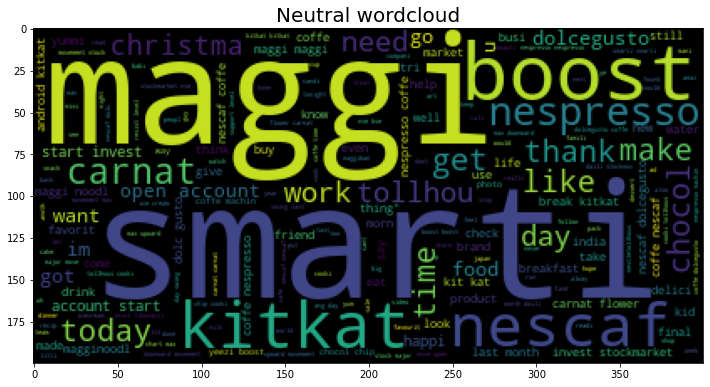

In [36]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['nestl', 'nestleindia','amp','rt','via','camat'])
wordcloud = WordCloud(stopwords=stop_words).generate(df[df['polarity']=='neutral']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Neutral wordcloud',fontsize=20)
plt.show()

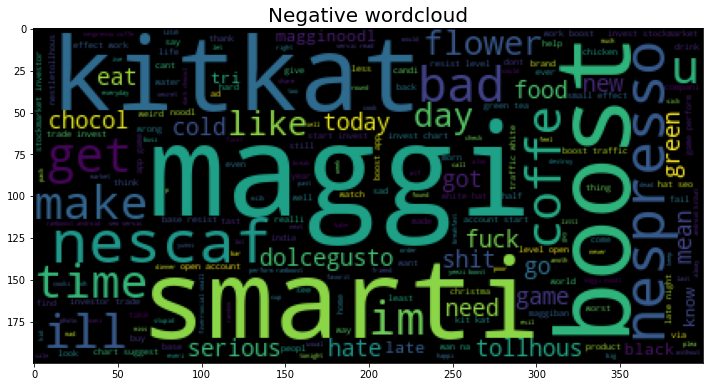

In [37]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.update(['ladi','one','amp','nestl','pink','nestleindia','nestleind','carnat','fibonacci','support'])
wordcloud = WordCloud(stopwords=stop_words).generate(df[df['polarity']=='negative']['Text'].str.cat(sep=" "))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title('Negative wordcloud',fontsize=20)
plt.show()

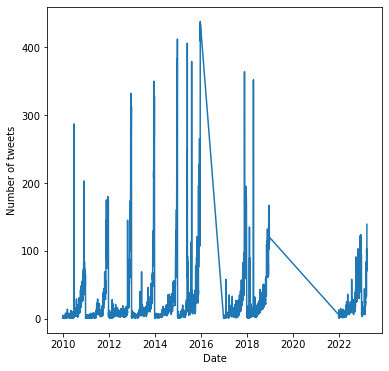

In [38]:
# Distribution of tweets over time
plt.figure(figsize=(6,6))
df['Date'].value_counts().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.show()

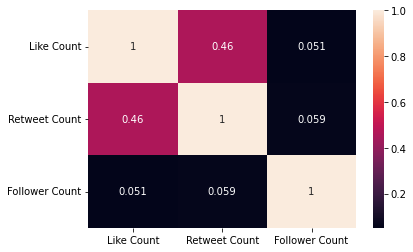

In [39]:
# Create correlation matrix
corr = df[['Like Count', 'Retweet Count', 'Follower Count', 'polarity']].corr()

# Create heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [40]:
# Preprocess text data
preprocessed_data = []
for text in df['Text']:
    tokens = word_tokenize(text.lower())
    preprocessed_data.append(tokens)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_data)
corpus = [dictionary.doc2bow(text) for text in preprocessed_data]

# Train the LDA model
num_topics = 1
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
for topic_id, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print("Topic:", topic_id)
    for word, weight in topic:
        print("\t", word, ":", weight)


Topic: 0
	 boost : 0.017191943
	 carnat : 0.013520521
	 coffe : 0.008862321
	 maggi : 0.00847628
	 kitkat : 0.00783318
	 smarti : 0.007335712
	 nespresso : 0.0071646897
	 nescaf : 0.0069566364
	 nestl : 0.0069443234
	 flower : 0.0044635204


<AxesSubplot:>

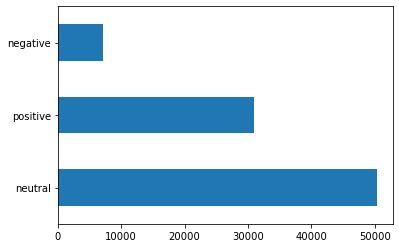

In [41]:
df['polarity'].value_counts().plot(kind='barh')

In [42]:
polarity = pd.DataFrame(df['polarity'].value_counts())

In [43]:
polarity.to_csv('polarity_counts.csv')

In [44]:
len(df[df['polarity']=='neutral'])/len(df)

0.5700276305657471